## Assignment 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

### Reading and Data Understanding 

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.replace('Select', np.nan)

#### Data Cleaning

In [7]:
(df.isnull().sum()/ df.shape[0] )*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
df.drop(['Prospect ID','Lead Number','How did you hear about X Education','Lead Quality', 'Lead Profile', 'Tags','Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score', 'Last Notable Activity', 'A free copy of Mastering The Interview'],axis= 1,inplace= True)


In [9]:
df.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,No,No,NaN,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,NaN,No


In [10]:
df.rename(columns= { 'What is your current occupation':'occupation',
                    'Total Time Spent on Website':'time_on_website',
                    'age Views Per Visit':'Page_Views_Per_Visit',
                    'what_is_your_current_occupation': 'occupation',
                    'What matters most to you in choosing a course' : 'course_selection_reason',
                    'Receive More Updates About Our Courses':'courses_updates',
                    'Update me on Supply Chain Content': 'supply_chain_content_updates',
                    'Get updates on DM Content':'dm_content_updates', 
                    'I agree to pay the amount through cheque' : 'mastering_interview'},inplace= True )

In [11]:
(df.isnull().sum()/ df.shape[0] )*100

Lead Origin                      0.000000
Lead Source                      0.389610
Do Not Email                     0.000000
Do Not Call                      0.000000
Converted                        0.000000
TotalVisits                      1.482684
time_on_website                  0.000000
Page Views Per Visit             1.482684
Last Activity                    1.114719
Country                         26.634199
Specialization                  36.580087
occupation                      29.112554
course_selection_reason         29.318182
Search                           0.000000
Magazine                         0.000000
Newspaper Article                0.000000
X Education Forums               0.000000
Newspaper                        0.000000
Digital Advertisement            0.000000
Through Recommendations          0.000000
courses_updates                  0.000000
supply_chain_content_updates     0.000000
dm_content_updates               0.000000
City                            39

#### Categorical Attributes check

In [12]:
df.Country.value_counts(normalize= True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

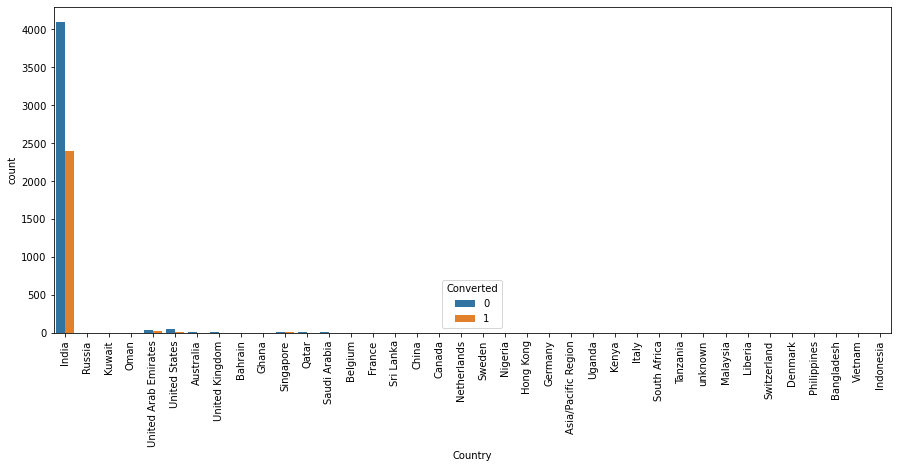

In [13]:
plt.figure(figsize=[15,6])
s1 = sns.countplot(df.Country,hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [14]:
df.Country  = df.Country.replace(np.nan,"India")

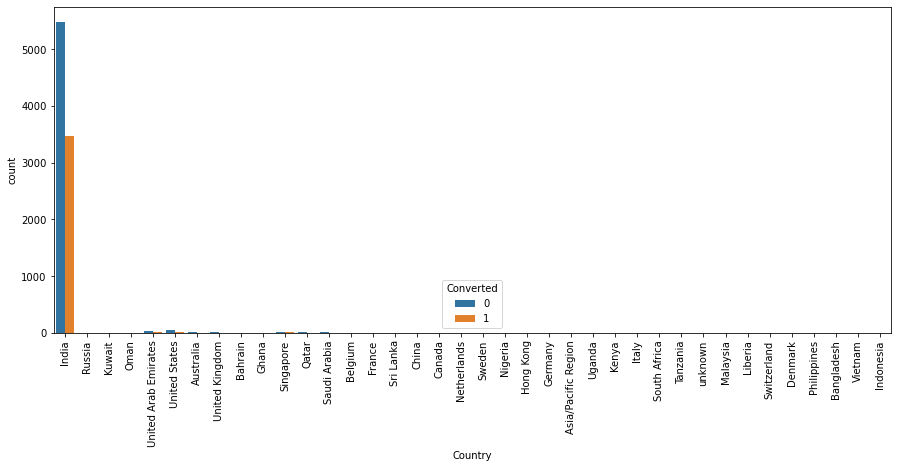

In [15]:
plt.figure(figsize=[15,6])
s1 = sns.countplot(df.Country,hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [16]:
round (df.Country.value_counts(normalize= True)*100)

India                   97.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

In [17]:
df.drop('Country',axis=1,inplace=True)

In [18]:
# City
df.City.value_counts(dropna= False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
df.City = df.City.replace(np.nan,"Mumbai" )

<AxesSubplot:xlabel='City', ylabel='count'>

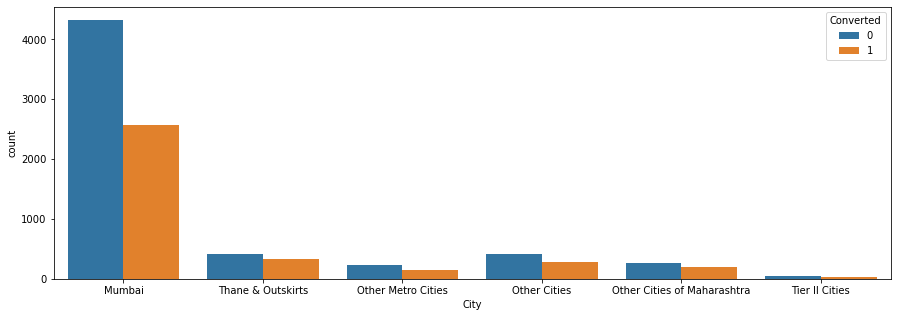

In [20]:
plt.figure(figsize=[15,5])
sns.countplot(df.City,hue=df.Converted)

In [21]:
df.City = df.City.replace(['Tier II Cities'],'Other Cities')

In [22]:
# Occupation
df.occupation.value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: occupation, dtype: int64

In [23]:
df.occupation = df.occupation.replace(np.nan,'Unemployed')
df.occupation = df.occupation.replace(['Housewife','Businessman'],'Other')

<AxesSubplot:xlabel='occupation', ylabel='count'>

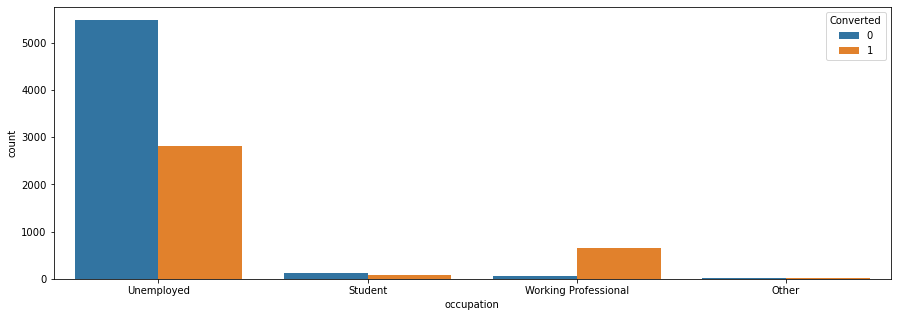

In [24]:
plt.figure(figsize=[15,5])
sns.countplot(df.occupation,hue=df.Converted)

In [25]:
# course_selection_reason
df.course_selection_reason.value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: course_selection_reason, dtype: int64

In [26]:
df.course_selection_reason = df.course_selection_reason.replace(np.nan, "Better Career Prospects")

<AxesSubplot:xlabel='course_selection_reason', ylabel='count'>

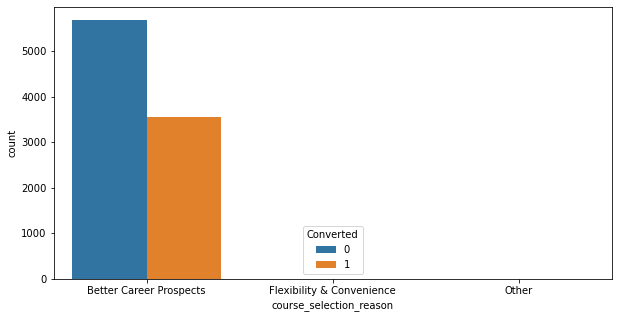

In [27]:
plt.figure(figsize=[10,5])
sns.countplot(df.course_selection_reason,hue=df.Converted)

In [28]:
df.drop('course_selection_reason',axis=1,inplace= True)

In [29]:
# Specialization
df.Specialization.value_counts(dropna= False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

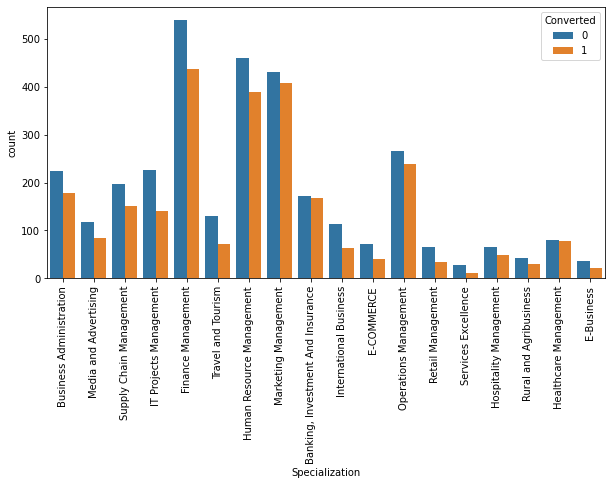

In [30]:
plt.figure(figsize= [10,5])
s1 = sns.countplot(df.Specialization , hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [31]:
df.Specialization = df.Specialization.replace(np.nan,"Not_Specified ")
df.Specialization = df.Specialization.replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')



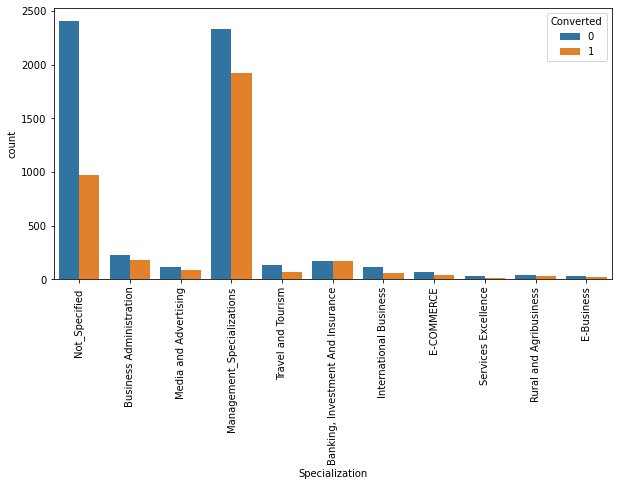

In [32]:
plt.figure(figsize= [10,5])
s1 = sns.countplot(df.Specialization , hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [33]:
# Last Activity
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [34]:
df['Last Activity'] = df['Last Activity'].replace((np.nan, 'Others'))

df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [35]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3485
SMS Sent                     2775
Olark Chat Conversation       981
Page Visited on Website       646
Converted to Lead             432
Email Bounced                 329
Email Link Clicked            269
Others                        205
Form Submitted on Website     118
Name: Last Activity, dtype: int64

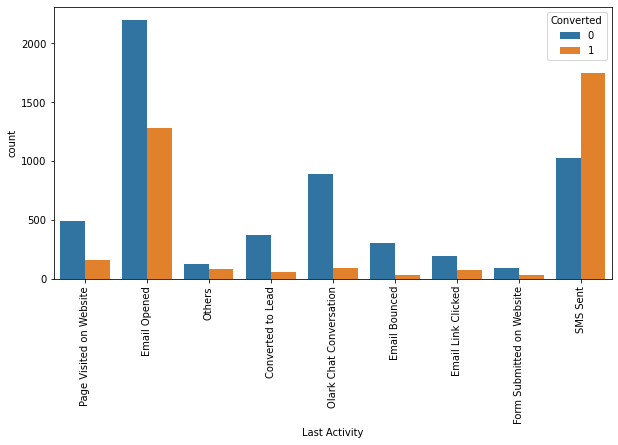

In [36]:
plt.figure(figsize= [10,5])
s1 = sns.countplot(df['Last Activity'] , hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [37]:
round(df.isnull().sum() / df.shape[0])*100


Lead Origin                     0.0
Lead Source                     0.0
Do Not Email                    0.0
Do Not Call                     0.0
Converted                       0.0
TotalVisits                     0.0
time_on_website                 0.0
Page Views Per Visit            0.0
Last Activity                   0.0
Specialization                  0.0
occupation                      0.0
Search                          0.0
Magazine                        0.0
Newspaper Article               0.0
X Education Forums              0.0
Newspaper                       0.0
Digital Advertisement           0.0
Through Recommendations         0.0
courses_updates                 0.0
supply_chain_content_updates    0.0
dm_content_updates              0.0
City                            0.0
mastering_interview             0.0
dtype: float64

In [38]:
# Lead Origin
df["Lead Origin"].value_counts(dropna= False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

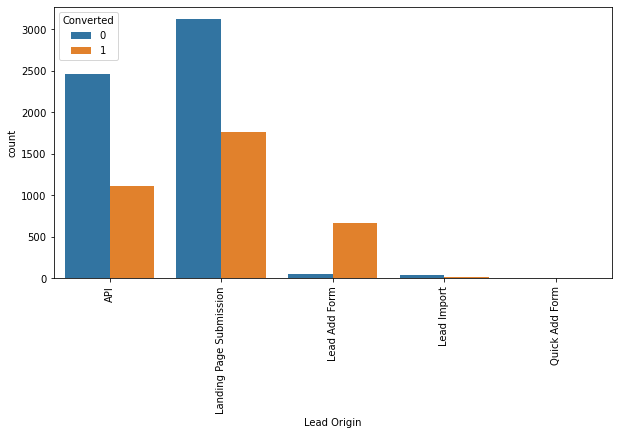

In [39]:
plt.figure(figsize= [10,5])
s1 = sns.countplot(df["Lead Origin"] , hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [40]:
# lead Source
df["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [41]:
df["Lead Source"] = df["Lead Source"].apply(lambda x : x if (( x == 'Google')|(x == 'Direct Traffic')|(x == 'Olark Chat')|(x == 'Organic Search')|(x == 'Reference ')
                                                            ) else 'Other Social Sites')
                                           

In [42]:
df["Lead Source"].value_counts(dropna=False)

Google                2868
Direct Traffic        2543
Olark Chat            1755
Organic Search        1154
Other Social Sites     920
Name: Lead Source, dtype: int64

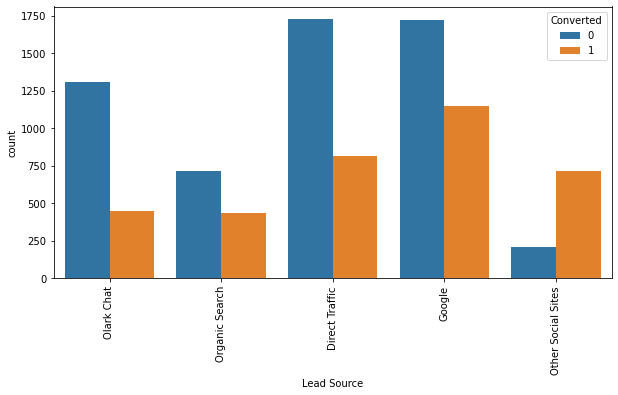

In [43]:
plt.figure(figsize= [10,5])
s1 = sns.countplot(df["Lead Source"] , hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [44]:
# IMBALANCED VARIABLES 

In [45]:
list1 = df[[ 'Do Not Email','Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'courses_updates', 'supply_chain_content_updates', 'dm_content_updates']]

for i in list1 : 
    x = (list1[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

No    100.0
Name: Magazine, dtype: float64

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

No    100.0
Name: courses_updates, dtype: float64

No    100.0
Name: supply_chain_content_updates, dtype: float64

No    100.0
Name: dm_content_updates, dtype: float64



Data is heavily imbalanced so it is better to drop the variable.

In [46]:
# Data is heavily imbalanced so it is better to drop the variable.
df.drop([ 'Do Not Email','Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'courses_updates', 'supply_chain_content_updates', 'dm_content_updates'],axis=1 , inplace= True )

In [47]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'time_on_website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'occupation', 'City', 'mastering_interview'],
      dtype='object')

In [48]:
df.corr()

,Converted,TotalVisits,time_on_website,Page Views Per Visit
Converted,1.000000,0.030395,0.362483,-0.003328
TotalVisits,0.030395,1.000000,0.221240,0.512125
time_on_website,0.362483,0.221240,1.000000,0.320361
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000


<AxesSubplot:>

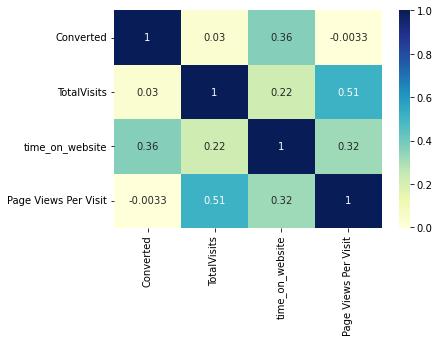

In [49]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

In [50]:
# Total Visits 
df['TotalVisits'].describe(percentiles= [0.05,.25, .5, .75,.80 ,.90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
80%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

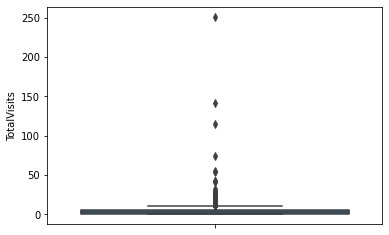

In [51]:
sns.boxplot(y = df['TotalVisits'])
plt.show()

In [52]:
df = df[(df.TotalVisits <= 20 )]

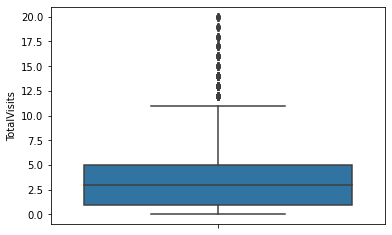

In [53]:
sns.boxplot(y = df['TotalVisits'])
plt.show()

In [54]:
df.shape

(9056, 11)

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

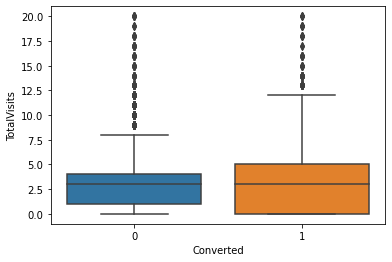

In [55]:
sns.boxplot(x =df.Converted, y= df['TotalVisits'])

In [56]:
# Time on website
df['time_on_website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9056.000000
mean      480.613516
std       544.942016
min         0.000000
5%          0.000000
25%         8.000000
50%       243.000000
75%       918.000000
90%      1372.000000
95%      1556.000000
99%      1837.900000
max      2272.000000
Name: time_on_website, dtype: float64

<AxesSubplot:ylabel='time_on_website'>

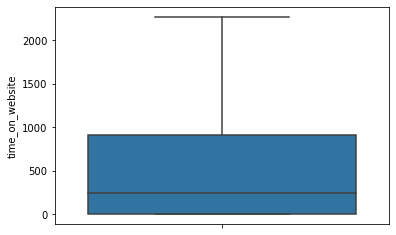

In [57]:
sns.boxplot(y= df.time_on_website)

<AxesSubplot:xlabel='Converted', ylabel='time_on_website'>

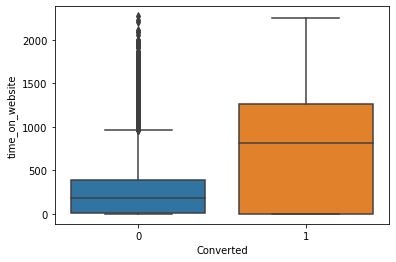

In [58]:
sns.boxplot(x =df.Converted, y= df['time_on_website'])

In [59]:
# Page Views Per Visit
df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9056.000000
mean        2.342778
std         2.063161
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:ylabel='Page Views Per Visit'>

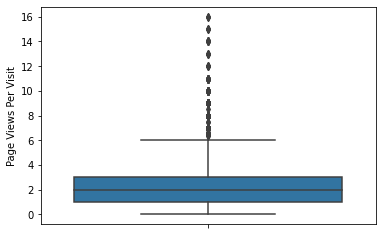

In [60]:
sns.boxplot(y= df['Page Views Per Visit'])

In [61]:
df = df[df['Page Views Per Visit'] < 10 ]

<AxesSubplot:ylabel='Page Views Per Visit'>

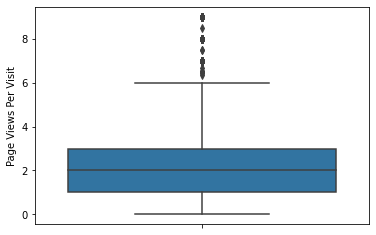

In [62]:
sns.boxplot(y= df['Page Views Per Visit'])

In [63]:
df.shape

(8988, 11)

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

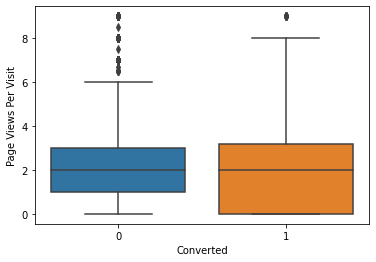

In [64]:
sns.boxplot(x =df.Converted, y= df['Page Views Per Visit'])

In [65]:
# mastering_interview 
df.mastering_interview = df.mastering_interview.apply(lambda x : 1 if x  == ' Yes' else 0 )

In [66]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,time_on_website,Page Views Per Visit,Last Activity,Specialization,occupation,City,mastering_interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not_Specified,Unemployed,Mumbai,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not_Specified,Unemployed,Mumbai,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not_Specified,Unemployed,Mumbai,0


In [67]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'time_on_website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'occupation', 'City', 'mastering_interview'],
      dtype='object')

###  Get Dummys

In [68]:
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Specialization', 'occupation', 'City','Last Activity']], drop_first= True)

df = pd.concat([df,dummy1],axis= 1)

In [69]:
df.drop(['Lead Origin', 'Lead Source', 'Specialization', 'occupation', 'City','Last Activity'],axis=1 , inplace= True)

In [70]:
df.head()

,Converted,TotalVisits,time_on_website,Page Views Per Visit,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Thane & Outskirts,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Train-Test Split & Logistic Regression Model Building:

In [71]:
y = df.Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [72]:
X = df.drop('Converted', axis= 1 )
X.head()

,TotalVisits,time_on_website,Page Views Per Visit,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Metro Cities,City_Thane & Outskirts,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X_train, X_test,y_train,y_test = train_test_split(X, y , train_size=.7 , test_size=.3, random_state= 100)

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6291 entries, 990 to 5803
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   TotalVisits                                6291 non-null   float64
 1   time_on_website                            6291 non-null   int64  
 2   Page Views Per Visit                       6291 non-null   float64
 3   mastering_interview                        6291 non-null   int64  
 4   Lead Origin_Landing Page Submission        6291 non-null   uint8  
 5   Lead Origin_Lead Add Form                  6291 non-null   uint8  
 6   Lead Origin_Lead Import                    6291 non-null   uint8  
 7   Lead Source_Google                         6291 non-null   uint8  
 8   Lead Source_Olark Chat                     6291 non-null   uint8  
 9   Lead Source_Organic Search                 6291 non-null   uint8  
 10  Lead Source_Other Soci

### Scaling of Data

In [75]:
scaler = StandardScaler()

X_train[['TotalVisits','time_on_website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['TotalVisits','time_on_website','Page Views Per Visit']])

X_train.head()

,TotalVisits,time_on_website,Page Views Per Visit,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Metro Cities,City_Thane & Outskirts,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
990,-0.057807,-0.530536,-0.408395,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1482,-0.057807,-0.234880,0.389576,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
110,0.936721,0.768503,1.985519,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4627,-0.389317,1.162095,-0.142404,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5220,-1.052336,-0.885323,-1.206366,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
df.corr()

,Converted,TotalVisits,time_on_website,Page Views Per Visit,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Thane & Outskirts,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Converted,1.000000,0.043841,0.351835,-0.006072,NaN,-0.040602,0.308564,-0.010799,0.027799,-0.126005,...,0.008993,0.043534,-0.127952,-0.038240,-0.026567,-0.033929,-0.210801,0.004284,-0.079703,0.340347
TotalVisits,0.043841,1.000000,0.340028,0.694981,NaN,0.422352,-0.260246,-0.056648,0.199538,-0.460695,...,0.065776,0.089989,-0.061388,-0.030355,0.056053,0.025720,-0.202853,0.035211,0.232945,0.012581
time_on_website,0.351835,0.340028,1.000000,0.350531,NaN,0.295862,-0.194314,-0.051448,0.221184,-0.378215,...,0.047007,0.077930,-0.035855,-0.039395,0.008992,0.010352,-0.190757,0.012811,0.033833,0.126297
Page Views Per Visit,-0.006072,0.694981,0.350531,1.000000,NaN,0.537837,-0.303102,-0.062509,0.252716,-0.552173,...,0.095270,0.090637,-0.036115,-0.041927,0.071563,0.013090,-0.252151,0.046775,0.105406,0.077948
mastering_interview,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead Origin_Landing Page Submission,-0.040602,0.422352,0.295862,0.537837,NaN,1.000000,-0.287985,-0.062954,0.083134,-0.526552,...,0.161255,0.156444,0.069533,-0.034250,0.043267,0.046854,-0.311093,0.036845,0.085452,0.060740
Lead Origin_Lead Add Form,0.308564,-0.260246,-0.194314,-0.303102,NaN,-0.287985,1.000000,-0.015832,-0.182098,-0.130185,...,-0.048806,0.001357,-0.048524,0.013578,-0.013242,-0.014858,-0.086288,-0.011452,-0.039126,0.143207
Lead Origin_Lead Import,-0.010799,-0.056648,-0.051448,-0.062509,NaN,-0.062954,-0.015832,1.000000,-0.040015,-0.028948,...,-0.002549,-0.003554,-0.011138,-0.010234,0.051974,-0.006698,-0.020427,-0.008599,-0.015874,-0.013802
Lead Source_Google,0.027799,0.199538,0.221184,0.252716,NaN,0.083134,-0.182098,-0.040015,1.000000,-0.334692,...,-0.069013,0.063774,-0.052849,-0.023388,0.031664,0.060935,-0.089468,0.019282,0.020975,0.011863
Lead Source_Olark Chat,-0.126005,-0.460695,-0.378215,-0.552173,NaN,-0.526552,-0.130185,-0.028948,-0.334692,1.000000,...,-0.085914,-0.112110,-0.020933,0.047471,-0.043070,-0.031029,0.424653,-0.040520,-0.094808,-0.127132


In [77]:
logreg = LogisticRegression()
rfe = RFE(logreg, step= 15)           
rfe = rfe.fit(X_train, y_train)

In [78]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False,  True,  True, False,  True])

In [79]:
list ( zip (X_train.columns,rfe.support_ ,rfe.ranking_))

[('TotalVisits', False, 3),
 ('time_on_website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('mastering_interview', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Other Social Sites', True, 1),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', False, 3),
 ('Specialization_E-COMMERCE', False, 3),
 ('Specialization_International Business', False, 2),
 ('Specialization_Management_Specializations', False, 3),
 ('Specialization_Media and Advertising', False, 2),
 ('Specialization_Not_Specified ', True, 1),
 ('Specialization_Rural and Agribusiness', False, 3),
 ('Specialization_Services Excellence', True, 1),
 ('Specialization_Travel and Tourism', True, 1),
 ('occupation_Student', True, 1),
 ('occupation_Unemployed', True, 1),
 (

In [80]:
clms = X_train.columns[rfe.support_]
clms

Index(['time_on_website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Other Social Sites',
       'Specialization_Not_Specified ', 'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'occupation_Student',
       'occupation_Unemployed', 'occupation_Working Professional',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent'],
      dtype='object')

In [81]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'mastering_interview',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website'],
      dtype='object')

In [82]:
X_train_sm = sm.add_constant(X_train[clms])

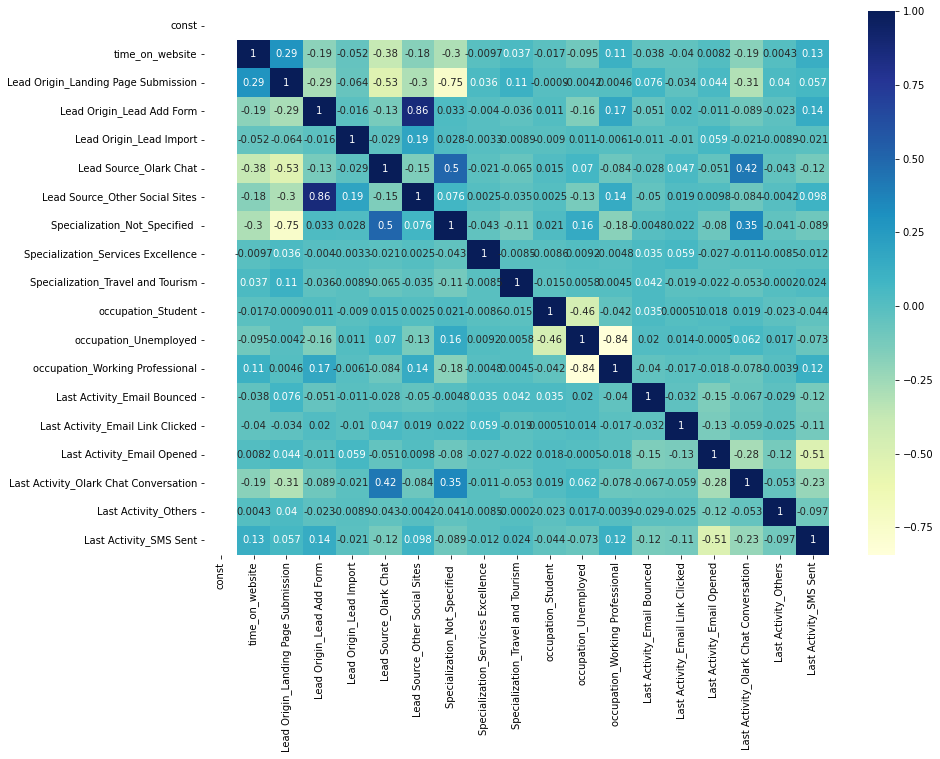

In [83]:
plt.figure(figsize = (14,10))       
sns.heatmap(X_train_sm.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [84]:
X_train_sm = sm.add_constant(X_train[clms])
logm1 = sm.GLM(y_train,X_train_sm ,family= sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6291
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.5
Date:                Sun, 08 Jan 2023   Deviance:                       5365.0
Time:                        22:15:55   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3783
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [85]:
clms = clms.drop('Lead Source_Other Social Sites',1)

In [86]:
X_train_sm = sm.add_constant(X_train[clms])
logm2 = sm.GLM(y_train,X_train_sm,  family= sm.families.Binomial())
print(logm2.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6291
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.5
Date:                Sun, 08 Jan 2023   Deviance:                       5365.0
Time:                        22:15:55   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3783
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [87]:
clms = clms.drop('Specialization_Services Excellence',1)

In [88]:
X_train_sm = sm.add_constant(X_train[clms])
logm3 = sm.GLM(y_train,X_train_sm,  family= sm.families.Binomial())
print (logm3.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6291
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.9
Date:                Sun, 08 Jan 2023   Deviance:                       5365.9
Time:                        22:15:56   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3782
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train[clms].columns
vif['VIF'] = [variance_inflation_factor(X_train[clms].values, i) for i in range(X_train[clms].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,occupation_Unemployed,16.34
1,Lead Origin_Landing Page Submission,6.94
5,Specialization_Not_Specified,4.32
12,Last Activity_Email Opened,4.00
15,Last Activity_SMS Sent,3.41
4,Lead Source_Olark Chat,2.40
13,Last Activity_Olark Chat Conversation,2.23
9,occupation_Working Professional,2.09
2,Lead Origin_Lead Add Form,1.59
7,occupation_Student,1.41


In [90]:
clms = clms.drop('Lead Origin_Landing Page Submission',1)

In [91]:
X_train_sm = sm.add_constant(X_train[clms])
logm4 = sm.GLM(y_train,X_train_sm,  family= sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6291
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.5
Date:                Sun, 08 Jan 2023   Deviance:                       5421.0
Time:                        22:15:56   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3727
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[clms].columns
vif['VIF'] = [variance_inflation_factor(X_train[clms].values, i) for i in range(X_train[clms].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,occupation_Unemployed,7.52
11,Last Activity_Email Opened,4.00
14,Last Activity_SMS Sent,3.40
4,Specialization_Not_Specified,2.32
12,Last Activity_Olark Chat Conversation,2.23
3,Lead Source_Olark Chat,2.11
8,occupation_Working Professional,1.60
0,time_on_website,1.32
1,Lead Origin_Lead Add Form,1.28
9,Last Activity_Email Bounced,1.28


In [93]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [94]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

990     0.099731
1482    0.191053
110     0.413597
4627    0.520002
5220    0.476996
3879    0.202190
700     0.374178
1710    0.792711
2196    0.702197
5656    0.970945
dtype: float64

In [95]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
990,0,0.099731,990
1482,0,0.191053,1482
110,1,0.413597,110
4627,1,0.520002,4627
5220,1,0.476996,5220


In [96]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
990,0,0.099731,990,0
1482,0,0.191053,1482,0
110,1,0.413597,110,0
4627,1,0.520002,4627,1
5220,1,0.476996,5220,0


In [97]:

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3496  405]
 [ 840 1550]]


In [98]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8020982355746304


In [99]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

In [100]:
TP / float(TP+FN)

0.6485355648535565

In [101]:
print(FP/ float(TN+FP))

0.10381953345296079


In [102]:
print (TP / float(TP+FP))

0.7928388746803069


In [103]:
print (TN / float(TN+ FN))

0.8062730627306273


In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

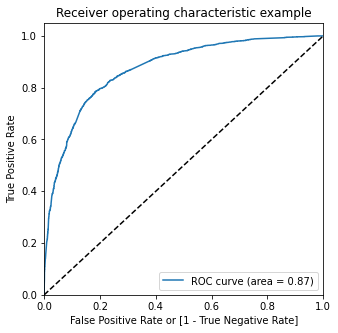

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
990,0,0.099731,990,0,1,0,0,0,0,0,0,0,0,0
1482,0,0.191053,1482,0,1,1,0,0,0,0,0,0,0,0
110,1,0.413597,110,0,1,1,1,1,1,0,0,0,0,0
4627,1,0.520002,4627,1,1,1,1,1,1,1,0,0,0,0
5220,1,0.476996,5220,0,1,1,1,1,1,0,0,0,0,0


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379908  1.000000  0.000000
0.1   0.1  0.589096  0.973222  0.353755
0.2   0.2  0.716102  0.916736  0.593181
0.3   0.3  0.784454  0.830544  0.756216
0.4   0.4  0.807026  0.760669  0.835427
0.5   0.5  0.802098  0.648536  0.896180
0.6   0.6  0.786997  0.566527  0.922071
0.7   0.7  0.775711  0.494979  0.947706
0.8   0.8  0.751073  0.395816  0.968726
0.9   0.9  0.701637  0.235146  0.987439


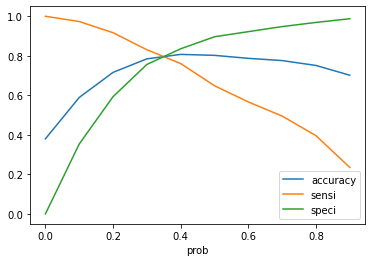

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [110]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
990,0,0.099731,990,0,1,0,0,0,0,0,0,0,0,0,0
1482,0,0.191053,1482,0,1,1,0,0,0,0,0,0,0,0,0
110,1,0.413597,110,0,1,1,1,1,1,0,0,0,0,0,1
4627,1,0.520002,4627,1,1,1,1,1,1,1,0,0,0,0,1
5220,1,0.476996,5220,0,1,1,1,1,1,0,0,0,0,0,1


In [111]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
990,0,0.099731,990,0,10
1482,0,0.191053,1482,0,19
110,1,0.413597,110,1,41
4627,1,0.520002,4627,1,52
5220,1,0.476996,5220,1,48


In [112]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7844539818788746

In [113]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2950,  951],
       [ 405, 1985]], dtype=int64)

In [114]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8305439330543933

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.7562163547808254

#### Accuracy : 78.44%
#### Sensitivity : 83.05%
#### Specificity : 75.62%

In [117]:
print(FP/ float(TN+FP))
print (TP / float(TP+FP))
print (TN / float(TN+ FN))

0.24378364521917456
0.6760899182561307
0.879284649776453


In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2950,  951],
       [ 405, 1985]], dtype=int64)

In [119]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6760899182561307

In [120]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8305439330543933

In [121]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6760899182561307

In [122]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8305439330543933

In [123]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

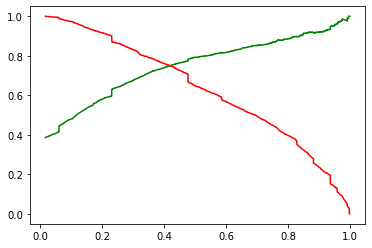

In [124]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [125]:

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,time_on_website,Page Views Per Visit,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Metro Cities,City_Thane & Outskirts,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
7112,0.546531,-0.562124,1.407930,0.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8995,0.863247,1.034138,0.372120,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5764,-0.403616,-0.491461,-0.145785,0.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4255,1.179963,-0.618292,0.631073,0.0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9225,-0.403616,-0.730628,-0.145785,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [126]:
X_test = X_test[clms]
X_test.head()

,time_on_website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Specialization_Not_Specified,Specialization_Travel and Tourism,occupation_Student,occupation_Unemployed,occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent
7112,-0.562124,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8995,1.034138,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5764,-0.491461,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4255,-0.618292,0,0,0,0,0,0,1,0,0,0,1,0,0,0
9225,-0.730628,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [127]:
X_test_sm = sm.add_constant(X_test)

In [128]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7112    0.141851
8995    0.740610
5764    0.151492
4255    0.134558
9225    0.013489
3540    0.235373
2736    0.189689
6761    0.112572
4408    0.263230
6395    0.752937
dtype: float64

In [129]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [130]:
y_pred_1.head()

,0
7112,0.141851
8995,0.740610
5764,0.151492
4255,0.134558
9225,0.013489


In [131]:
y_test_df = pd.DataFrame(y_test)

In [132]:
y_test_df['Prospect ID'] = y_test_df.index

In [133]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [134]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [135]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7112,0.141851
1,1,8995,0.740610
2,0,5764,0.151492
3,0,4255,0.134558
4,0,9225,0.013489


In [136]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [137]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7112,0.141851
1,1,8995,0.740610
2,0,5764,0.151492
3,0,4255,0.134558
4,0,9225,0.013489


In [138]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [139]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7112,0,0.141851,14
1,8995,1,0.740610,74
2,5764,0,0.151492,15
3,4255,0,0.134558,13
4,9225,0,0.013489,1


In [140]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [141]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7112,0,0.141851,14,0
1,8995,1,0.740610,74,1
2,5764,0,0.151492,15,0
3,4255,0,0.134558,13,0
4,9225,0,0.013489,1,0


In [142]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7908787541713015

In [143]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1269,  408],
       [ 156,  864]], dtype=int64)

In [144]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [145]:
TP / float(TP+FN)

0.8470588235294118

In [146]:
TN / float(TN+FP)

0.7567084078711985

In [147]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6792452830188679

In [148]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8470588235294118

#### After running the model on the Test Data:

#### Accuracy : 79.08%
#### Sensitivity : 84.70%
#### Specificity : 75.76%